<a href="https://colab.research.google.com/github/ParkChanHwi/python-data-analytics/blob/main/SimpleLinearRegression_class1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Lab: Linear Regression***

  Based on the *ISL with Python* Chapter 3.6

**1. Install ISLP package**

In [1]:
%pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=b08254abc176c18df0b933eb45b62937ff18a8c653ac9d12748f91b02c95cc94
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

**2. Importing packages**

In [1] - In [4]을 참고하여 필요한 패키지를 모두 불러 올 것

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [5]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# ***Simple Linear Regression***

Our response will be *medv* (median house value) and *lstat* (percent of households with low socioeconomic status) will be the single predictor.

**1. Read the data "Boston"**

In [8]를 참고하여 Boston 데이터를 불러올 것

In [6]:
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

**2. Extract the variables and conduct linear regression using `sm.OSL()`**


In [9] - In [10]을 참고하여 `sm.OLS` 으로 선형회귀분석을 할 것. 단, 입력변수와 출력변수는 각각 lstat와 medv.

In [9]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
y = Boston['medv']

model = sm.OLS(y,X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        07:13:01   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3. Summarize results**

In [11]을 참고하여 결과(b0과 b1 값)를 확인할 것

In [10]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


# **Predictions**

x= 5, 10, 15 일 때의 y(예측값)을 구할 것.

In [11]:
results.params.intercept + results.params.lstat*np.array([5,10,15])

array([29.80359411, 25.05334734, 20.30310057])

# **Simple Linear Regression (manually)**

define b0 and b1 using the fomular from the last lecture

기울기와 절편 (b0 and b1)을 구하는 공식을 직접 작성해 볼것.

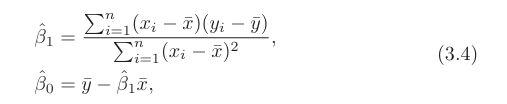

In [12]:

b1= sum((X['lstat']-X['lstat'].mean())*(y-y.mean()))/sum((X['lstat']-X['lstat'].mean())**2)
b0= y.mean()-b1*X['lstat'].mean()
print('b0:',b0)
print('b1:',b1)

b0: 34.5538408793831
b1: -0.9500493537579907


Compare results from `summarize(results)`

앞서 `sm.OLS` 로 구한 값과 계수를 비교해 보세요.

In [13]:
print('b0:',b0)
print('b1:',b1)

b0: 34.5538408793831
b1: -0.9500493537579907


가설검증

In [14]:
yhat = b0+b1*X['lstat']
varience = np.sum((y-yhat)**2/(len(y)-2))

se_b0 = np.sqrt(varience/np.sum((X['lstat']-X['lstat'].mean())**2))
se_b1 = np.sqrt(varience*sum((X['lstat']-X['lstat'].mean())**2)/np.sum((X['lstat']-X['lstat'].mean())**4))

print('se_b0:',se_b0)
print('se_b1:',se_b1)

se_b0: 0.03873341621263942
se_b1: 0.467290711707607


# **Visualisation**

In [20] - In[22]를 참고하여 입력, 출력 데이터 (scatter plot, 붉은색 점)과 선형회귀선 (파란색 선)을 그릴 것.

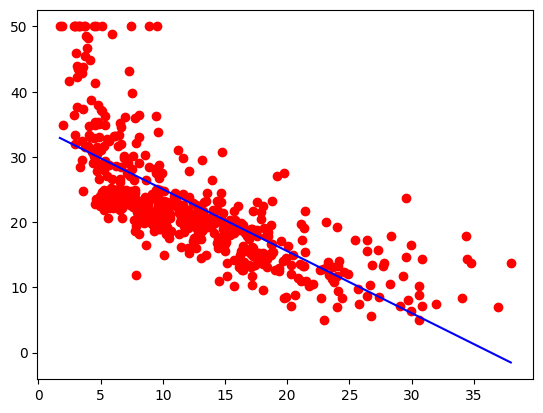

In [17]:
xx=np.linspace(X['lstat'].min(),X['lstat'].max(),100)
yy=b0+b1*xx
plt.scatter(X['lstat'], y, color='red')
plt.plot(xx, yy, color='blue')

In [24]:
def abline (ax, b, m, *args, **kwargs) :
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m* xlim[1] + b]
    ax.plot(xlim,ylim)

<ipython-input-30-a57d7329141c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
<ipython-input-30-a57d7329141c>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


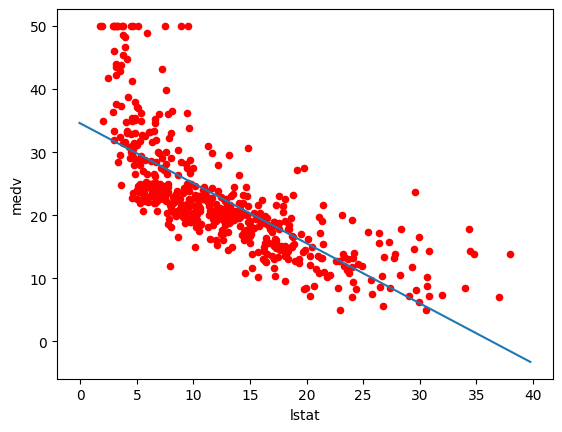

In [30]:
ax = Boston.plot.scatter(x='lstat',y='medv', color='red')
abline(ax,
       results.params[0],
       results.params[1],
       color = 'blue'
       'r--',
       linewidth=3)